---
# Part 3 of Practical Stats for Data Scientists, reworked for Python
---

This notebook assumes that the datasets referenced in Stats4DS.ipynb have been loaded.

The notebook picks up at Chapter 6 Logistics Regression

---
## Introduction

In [1]:
%matplotlib inline

In [3]:
# get numerical and data mgt modules
import numpy as np
import pandas as pd

# import graphics modules
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning modules
import sklearn.linear_model
import sklearn.metrics
import sklearn.feature_selection
import sklearn.neighbors
import sklearn.tree

# import statistics modules (statsmodeles supressed until needed) because of warning message)
#import statsmodels.api as sm
from scipy import stats

---
## K Means Example

### Load Data

In [29]:
loans_df = pd.read_csv('data/loan200.csv')

In [30]:
loans_df.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [31]:
loans_df['outcome'].unique()

array(['target', 'default', 'paid off'], dtype=object)

### Visualize Data

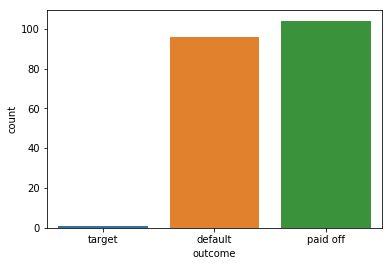

In [32]:
sns.countplot(x='outcome', data=loans_df)

In [33]:
loans2_df = loans_df.iloc[1:]

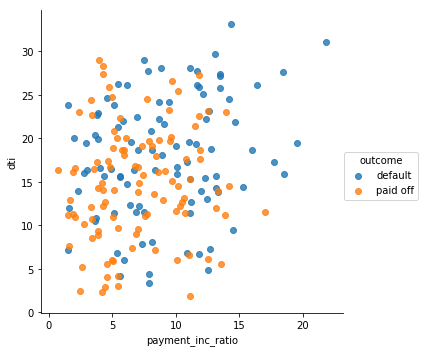

In [34]:
sns.lmplot(y='dti', x='payment_inc_ratio', hue='outcome', data=loans2_df, fit_reg=False)

In [40]:
loans3_df = loans2_df.copy()
loans3_df['code'] = 0
loans3_df['code'] = loans3_df['code'].where(loans3_df['outcome']=='paid off', 1)

In [41]:
loans3_df.head()

,outcome,payment_inc_ratio,dti,code
1,default,5.46933,21.33,1
2,paid off,6.90294,8.97,0
3,paid off,11.14800,1.83,0
4,default,3.72120,10.81,1
5,paid off,1.89923,11.34,0


In [47]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)

In [48]:
X = loans3_df[['dti', 'payment_inc_ratio']]
y = loans3_df['code']

neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [70]:
X_new = [[22.5, 9]]
print(neigh.predict(X_new))
print(neigh.predict_proba(X_new))

[0]
[[0.55 0.45]]


In [55]:
X.head()

,dti,payment_inc_ratio
1,21.33,5.46933
2,8.97,6.90294
3,1.83,11.14800
4,10.81,3.72120
5,11.34,1.89923


Text(0.5,1,'20 Nearest Neighbors to Test Point')

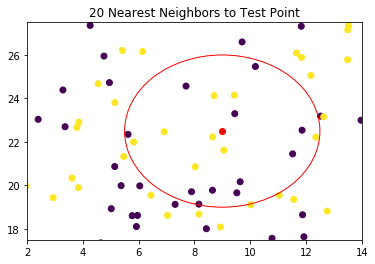

In [85]:
plt.scatter(y=X['dti'], x = X['payment_inc_ratio'], c=loans3_df['code'])
plt.scatter(y=22.5, x=9, color='r')
plt.xlim((2,14))
plt.ylim((17.5, 27.5))
circle=plt.Circle( (9,22.5), 3.5, color='r', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
ax.set_title('20 Nearest Neighbors to Test Point')

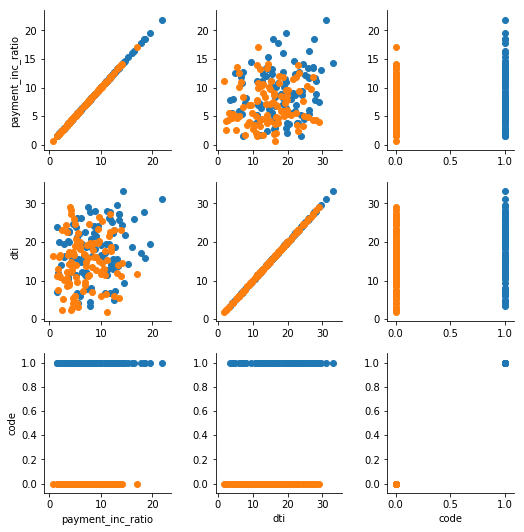

In [84]:
g = sns.PairGrid(loans3_df, hue='outcome')
g = g.map(plt.scatter)

---
## Decision Tree Example

In [7]:
n_samples = 100
x1 = 2.0*np.random.normal(size=n_samples)
x2 = 3.0*np.random.normal(size=n_samples)
x3 = 1.0*np.random.normal(size=n_samples)
x4 = 5.0*np.random.normal(size=n_samples)

# y depends on x1, x2 only

y = [1 if v1>-0.5 and v2>0 else 0 for v1, v2 in zip(x1, x2)]

In [8]:
ex_df = pd.DataFrame(data = {'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})

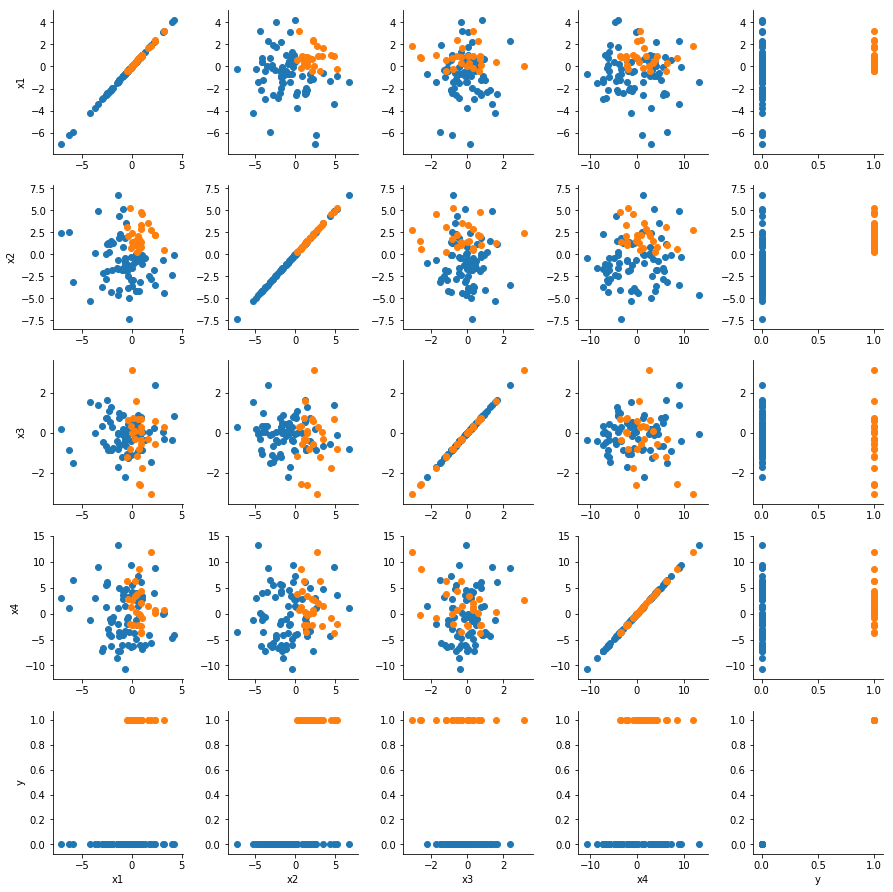

In [9]:
g = sns.PairGrid(ex_df, hue="y")
g.map(plt.scatter)

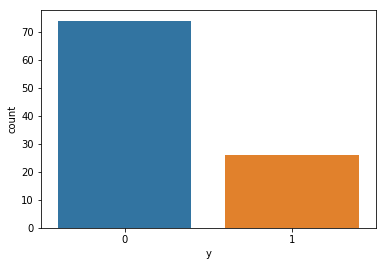

In [50]:
sns.countplot(x='y', data = ex_df)

In [37]:
clf = sklearn.tree.DecisionTreeClassifier()

In [38]:
ex2_df = ex_df[['x1', 'x2', 'x3', 'x4']]
clf.fit(ex2_df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
y3 = clf.predict(ex2_df)

In [40]:
sklearn.metrics.confusion_matrix(y, y3)

array([[74,  0],
       [ 0, 26]], dtype=int64)

In [41]:
print(clf.n_features_)

4


In [42]:
print(clf.classes_)
print(clf.feature_importances_)

[0 1]
[0.53425519 0.46574481 0.         0.        ]


In [51]:
np.sum(ex_df['y'])

26

In [21]:
%reload_ext gvmagic

In [44]:
print(sklearn.tree.export_graphviz(clf, out_file=None) )

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.248\ngini = 0.385\nsamples = 100\nvalue = [74, 26]"] ;
1 [label="gini = 0.0\nsamples = 57\nvalue = [57, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= -0.513\ngini = 0.478\nsamples = 43\nvalue = [17, 26]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 17\nvalue = [17, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26]"] ;
2 -> 4 ;
}


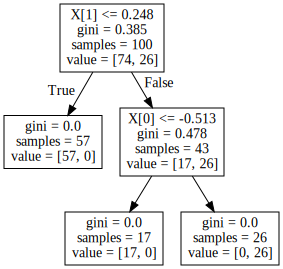

In [45]:
%%dot

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.248\ngini = 0.385\nsamples = 100\nvalue = [74, 26]"] ;
1 [label="gini = 0.0\nsamples = 57\nvalue = [57, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= -0.513\ngini = 0.478\nsamples = 43\nvalue = [17, 26]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 17\nvalue = [17, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26]"] ;
2 -> 4 ;
}

In [28]:
ex_df.columns.values

array(['x1', 'x2', 'x3', 'x4', 'y'], dtype=object)

In [47]:

print(sklearn.tree.export_graphviz(clf, out_file=None, feature_names = ex_df.columns.values[0:4], class_names = ['0', '1']) )

digraph Tree {
node [shape=box] ;
0 [label="x2 <= 0.248\ngini = 0.385\nsamples = 100\nvalue = [74, 26]\nclass = 0"] ;
1 [label="gini = 0.0\nsamples = 57\nvalue = [57, 0]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x1 <= -0.513\ngini = 0.478\nsamples = 43\nvalue = [17, 26]\nclass = 1"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = 0"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = 1"] ;
2 -> 4 ;
}


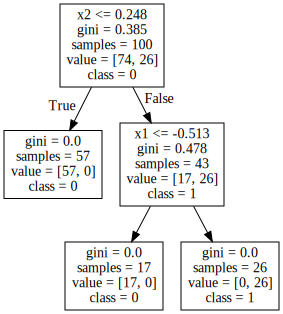

In [48]:
%%dot


digraph Tree {
node [shape=box] ;
0 [label="x2 <= 0.248\ngini = 0.385\nsamples = 100\nvalue = [74, 26]\nclass = 0"] ;
1 [label="gini = 0.0\nsamples = 57\nvalue = [57, 0]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x1 <= -0.513\ngini = 0.478\nsamples = 43\nvalue = [17, 26]\nclass = 1"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = 0"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = 1"] ;
2 -> 4 ;
}

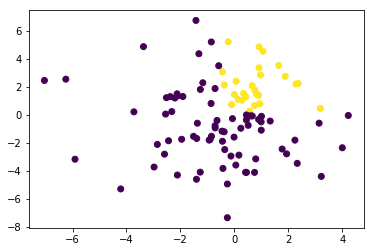

In [52]:
plt.scatter(x=ex_df['x1'], y=ex_df['x2'], c=y3)

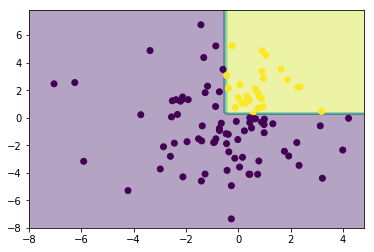

In [69]:
# the size of the mesh we are going to put over the scatter plot, showing decision tree regions
plot_step=0.2

#  create x,y mesh  (lazy, max/ min /x/y judged by eye)
xx, yy = np.meshgrid(np.arange(-8.0, 5.0, plot_step),
                     np.arange(-8.0, 8.0, plot_step))

#  create a list of feature tuples to predict; as only x1, x2 in decision tree set x3, x4 to zero (could be any value)
XX = [[v1, v2, 0.0, 0.0] for v1, v2 in zip(xx.ravel(), yy.ravel()) ]

# predict the value at each grid point  ( a list of predictions)
ZZ = clf.predict(XX)

# turn the predition list back into a grid of values, matching our xx, yy grid
ZZ = ZZ.reshape(xx.shape)

# fill the contours with color
cs = plt.contourf(xx,yy, ZZ, alpha=0.4)

# plot the original points
plt.scatter(x=ex_df['x1'], y=ex_df['x2'], c=y)


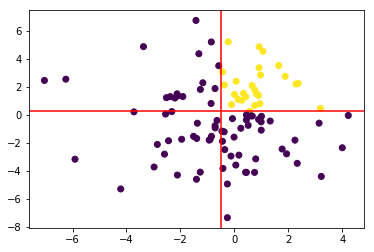

In [75]:
# plot the original points
plt.scatter(x=ex_df['x1'], y=ex_df['x2'], c=y)

# add the decision tree lines
plt.axvline(-0.513, color='r')
plt.axhline(0.248, color='r')

In [63]:
print(xx.shape, yy.shape)

(75, 65) (75, 65)


In [74]:
clf.predict_proba([[0,0,0,0]])

array([[1., 0.]])

In [76]:
clf.decision_path([[0,0,0,0]])

<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [77]:
estimator = clf

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 0.2475728690624237 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 0] <= -0.5131229758262634 else to node 4.
		node=3 leaf node.
		node=4 leaf node.

